#**MNIST Data Classifier**

---







### Importing Libraries

In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.datasets import mnist
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid", context='notebook')

In [0]:
(X_train, y_train), (X_test, y_test)=mnist.load_data()

### Visualizing Our Datasets

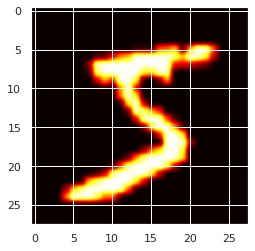

In [224]:
plt.imshow(X_train[0], cmap='hot', interpolation='hamming')

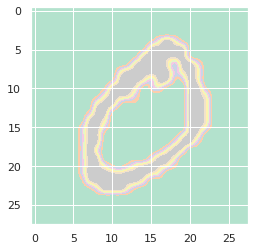

In [225]:
plt.imshow(X_train[1], cmap='Pastel2', interpolation='spline36')

#### Normalising the data because pixels values lie between 0 and 255

In [0]:
X_train.shape
X_train=X_train/255
X_test=X_test/255

In [0]:
import numpy as np
filtern=np.random.randn(28, 28)
#applying filters
appfil=np.dot(X_train[0], filtern)
diffil=np.where(X_train[0]>0, 100, 1000)

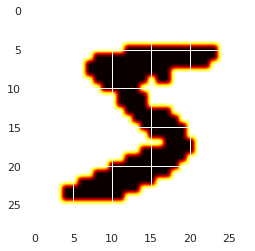

In [228]:
plt.imshow(diffil, cmap='hot', interpolation='hamming')

In [0]:
#flattening the shapes of training and test sets to train in the neural network
flat_X_train, flatten_X_test=np.array([i.flatten() for i in X_train]), np.array([l.flatten() for l in X_test])


###Creating our Classifier

In [0]:
def neural_network():
  
  model=Sequential()
  model.add(Dense(784, activation='relu', input_shape=(784,)))
  model.add(Dense(128, activation='relu'))
  model.add(Dense(20, activation='relu'))
  model.add(Dense(10, activation='softmax'))

  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [0]:
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

###Training and Evaluating our Dataset

In [234]:
classifier=neural_network()
classifier.fit(flat_X_train,  y_train, validation_data=(flatten_X_test, y_test), epochs=10, verbose=2)
scores=classifier.evaluate(flatten_X_test, y_test, verbose=0)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 21s - loss: 0.2131 - acc: 0.9360 - val_loss: 0.1017 - val_acc: 0.9700
Epoch 2/10
 - 20s - loss: 0.0867 - acc: 0.9734 - val_loss: 0.0897 - val_acc: 0.9720
Epoch 3/10
 - 22s - loss: 0.0577 - acc: 0.9822 - val_loss: 0.0769 - val_acc: 0.9790
Epoch 4/10
 - 21s - loss: 0.0445 - acc: 0.9859 - val_loss: 0.1006 - val_acc: 0.9704
Epoch 5/10
 - 21s - loss: 0.0350 - acc: 0.9887 - val_loss: 0.0998 - val_acc: 0.9743
Epoch 6/10
 - 21s - loss: 0.0297 - acc: 0.9906 - val_loss: 0.0748 - val_acc: 0.9797
Epoch 7/10
 - 22s - loss: 0.0269 - acc: 0.9910 - val_loss: 0.0906 - val_acc: 0.9768
Epoch 8/10
 - 21s - loss: 0.0225 - acc: 0.9929 - val_loss: 0.0863 - val_acc: 0.9795
Epoch 9/10
 - 21s - loss: 0.0168 - acc: 0.9943 - val_loss: 0.0929 - val_acc: 0.9813
Epoch 10/10
 - 21s - loss: 0.0196 - acc: 0.9939 - val_loss: 0.0818 - val_acc: 0.9812


In [237]:
print('Final Test Accuracy: {:.3f}%'.format(scores[1]*100))

Final Test Accuracy: 98.120%


###Predicting a digit

In [244]:
classifier.predict(flatten_X_test[1].reshape(1, -1)).argmax()

2

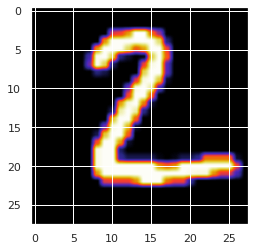

In [245]:
plt.imshow(X_test[1], cmap='CMRmap', interpolation='hermite')

***Correctly Predicted***